In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_excel("womens-earnings.xlsx", sheet_name="Table 3", header=1)

In [3]:
df.head()

,State,Number\nof\nworkers\n(in\nthousands),Transformowana liczba pracowników,Median\nweekly\nearnings,Transformowana mediana zarobków,Number\nof\nworkers\n(in\nthousands).1,Transformowana liczba kobiet pracujących,Median\nweekly\nearnings.1,Number\nof\nworkers\n(in\nthousands).2,Transformowana ilość mężczyzn pracujących,Median\nweekly\nearnings.2
0,United States,110387,5.042918,984,2.992995,49476,4.694395,891,60911,4.784696,1082
1,Alabama,1628,3.211654,887,2.947924,745,2.872156,791,884,2.946452,978
2,Alaska,238,2.376577,1021,3.009026,106,2.025306,913,132,2.120574,1128
3,Arizona,2384,3.377306,932,2.969416,1073,3.030600,856,1312,3.117934,991
4,Arkansas,995,2.997823,849,2.928908,443,2.646404,771,552,2.741939,917


In [4]:
df = df.set_index("State")

In [5]:
df

,Number\nof\nworkers\n(in\nthousands),Transformowana liczba pracowników,Median\nweekly\nearnings,Transformowana mediana zarobków,Number\nof\nworkers\n(in\nthousands).1,Transformowana liczba kobiet pracujących,Median\nweekly\nearnings.1,Number\nof\nworkers\n(in\nthousands).2,Transformowana ilość mężczyzn pracujących,Median\nweekly\nearnings.2
State,,,,,,,,,,
United States,110387,5.042918,984,2.992995,49476,4.694395,891,60911,4.784696,1082
Alabama,1628,3.211654,887,2.947924,745,2.872156,791,884,2.946452,978
Alaska,238,2.376577,1021,3.009026,106,2.025306,913,132,2.120574,1128
Arizona,2384,3.377306,932,2.969416,1073,3.030600,856,1312,3.117934,991
Arkansas,995,2.997823,849,2.928908,443,2.646404,771,552,2.741939,917
California,12544,4.098436,1063,3.026533,5401,3.732474,993,7143,3.853881,1133
Colorado,2008,3.302764,1103,3.042576,834,2.921166,966,1174,3.069668,1237
Connecticut,1221,3.086716,1190,3.075547,536,2.729165,1166,684,2.835056,1202
Delaware,358,2.553883,947,2.976350,168,2.225309,838,190,2.278754,1076


In [6]:
df_clean = df[[col for col in df.columns if "Transformowana" not in col]]

df_clean.columns = [
    "Total_Workers",
    "Median_Weekly_Earnings_All",
    "Women_Workers",
    "Median_Weekly_Earnings_Women",
    "Men_Workers",
    "Median_Weekly_Earnings_Men"
]

In [7]:
df_clean

,Total_Workers,Median_Weekly_Earnings_All,Women_Workers,Median_Weekly_Earnings_Women,Men_Workers,Median_Weekly_Earnings_Men
State,,,,,,
United States,110387,984,49476,891,60911,1082
Alabama,1628,887,745,791,884,978
Alaska,238,1021,106,913,132,1128
Arizona,2384,932,1073,856,1312,991
Arkansas,995,849,443,771,552,917
California,12544,1063,5401,993,7143,1133
Colorado,2008,1103,834,966,1174,1237
Connecticut,1221,1190,536,1166,684,1202
Delaware,358,947,168,838,190,1076


In [8]:
df_clean.to_excel("earnings_2020.xlsx", index=True)

In [9]:
df=df_clean

In [10]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, United States to Wyoming
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Total_Workers                 51 non-null     int64
 1   Median_Weekly_Earnings_All    51 non-null     int64
 2   Women_Workers                 51 non-null     int64
 3   Median_Weekly_Earnings_Women  51 non-null     int64
 4   Men_Workers                   51 non-null     int64
 5   Median_Weekly_Earnings_Men    51 non-null     int64
dtypes: int64(6)
memory usage: 2.8+ KB


,Total_Workers,Median_Weekly_Earnings_All,Women_Workers,Median_Weekly_Earnings_Women,Men_Workers,Median_Weekly_Earnings_Men
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,4322.784314,964.784314,1937.117647,866.960784,2385.647059,1062.549020
std,15336.321657,103.081582,6871.155419,105.321785,8465.536732,107.596713
min,195.000000,764.000000,84.000000,675.000000,109.000000,878.000000
25%,603.000000,888.000000,266.500000,791.000000,346.000000,988.000000
50%,1457.000000,940.000000,693.000000,851.000000,787.000000,1040.000000
75%,2929.000000,1023.500000,1280.000000,933.500000,1634.000000,1128.000000
max,110387.000000,1239.000000,49476.000000,1166.000000,60911.000000,1356.000000


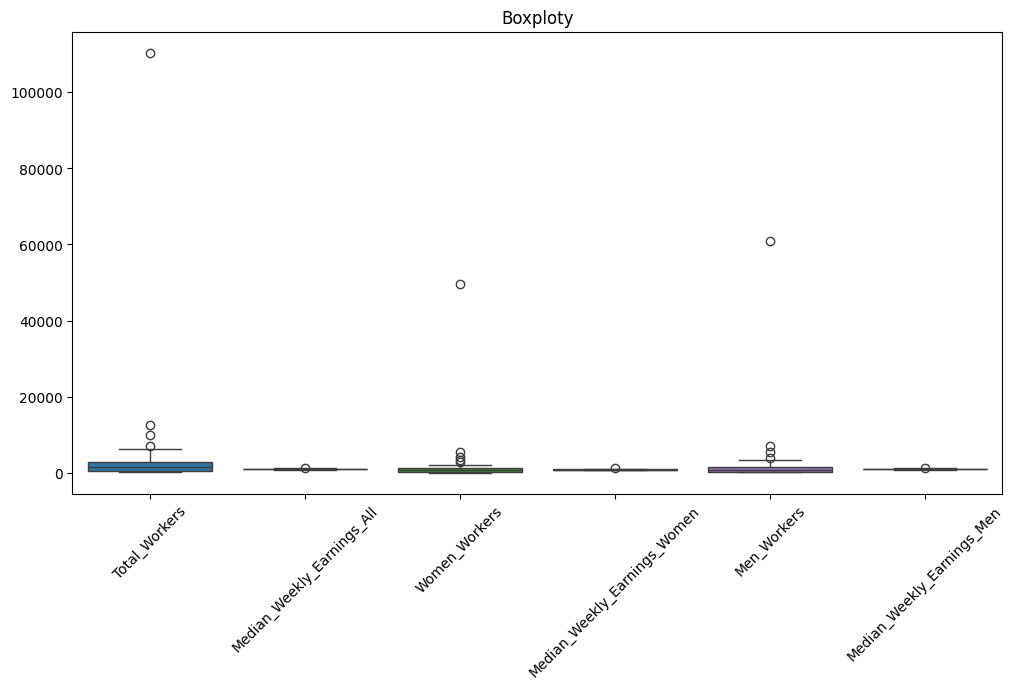

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxploty")
plt.show()

In [12]:
df=df.iloc[1:]

In [13]:
df

,Total_Workers,Median_Weekly_Earnings_All,Women_Workers,Median_Weekly_Earnings_Women,Men_Workers,Median_Weekly_Earnings_Men
State,,,,,,
Alabama,1628,887,745,791,884,978
Alaska,238,1021,106,913,132,1128
Arizona,2384,932,1073,856,1312,991
Arkansas,995,849,443,771,552,917
California,12544,1063,5401,993,7143,1133
Colorado,2008,1103,834,966,1174,1237
Connecticut,1221,1190,536,1166,684,1202
Delaware,358,947,168,838,190,1076
Florida,7025,904,3249,831,3776,988


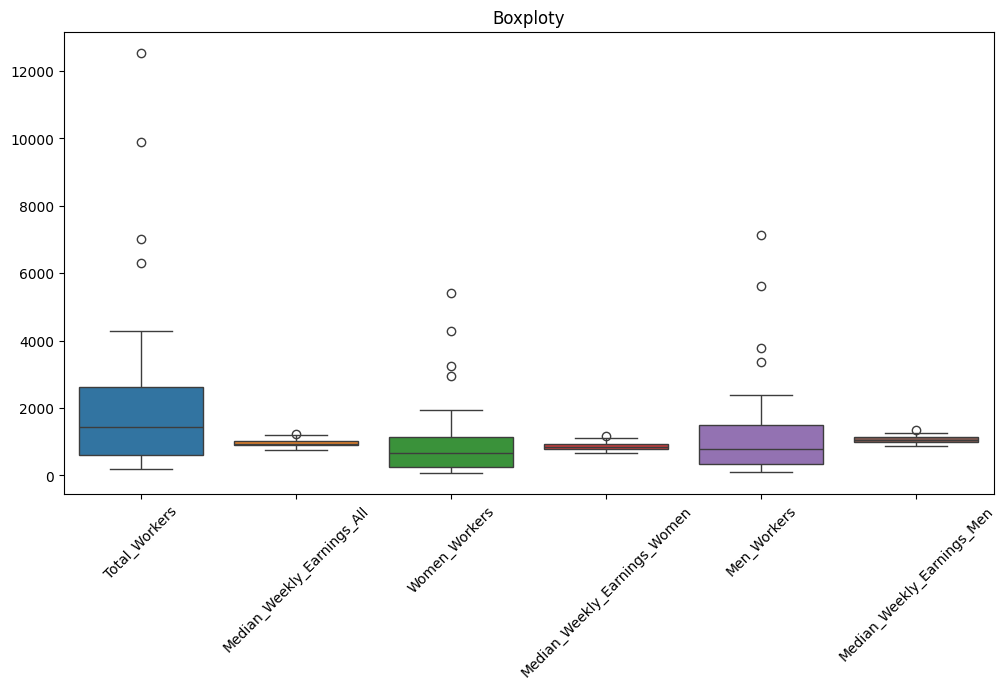

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxploty")
plt.show()

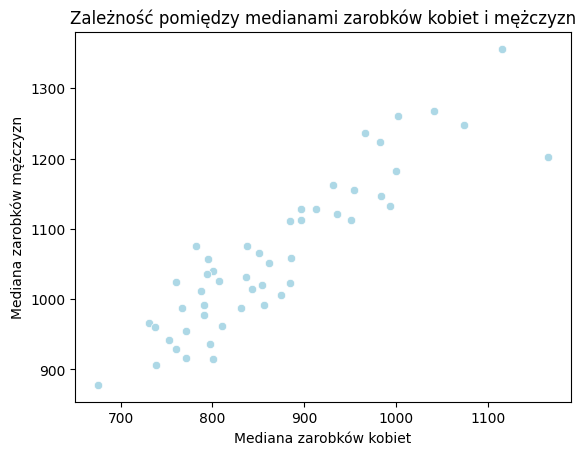

In [15]:
sns.scatterplot(x=df["Median_Weekly_Earnings_Women"], y=df["Median_Weekly_Earnings_Men"], color="lightblue")
plt.title("Zależność pomiędzy medianami zarobków kobiet i mężczyzn")
plt.xlabel("Mediana zarobków kobiet")
plt.ylabel("Mediana zarobków mężczyzn")
plt.show()

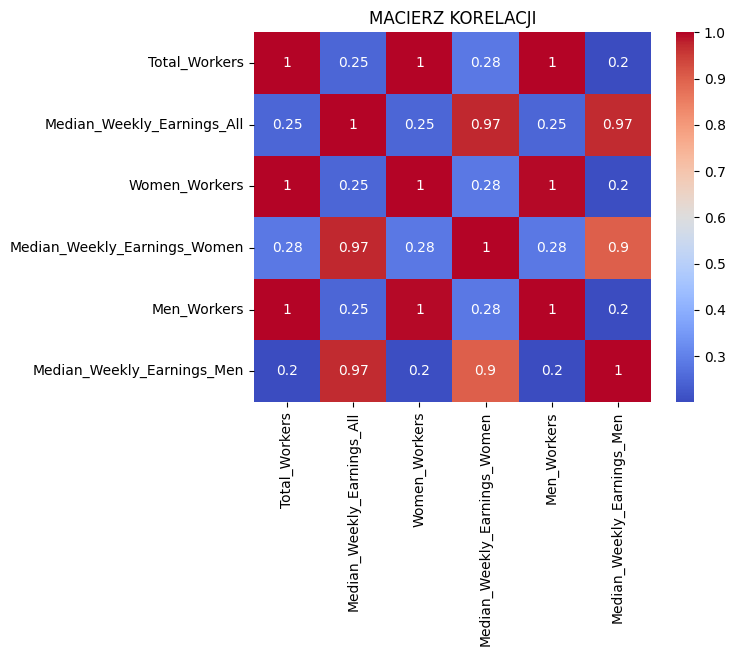

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("MACIERZ KORELACJI")
plt.show()

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
df_scaled

array([[-0.23999056, -0.75112787, -0.22908094, -0.71704197, -0.24744438,
        -0.78244089],
       [-0.82165904,  0.54927438, -0.83562242,  0.44192889, -0.80937642,
         0.61211868],
       [ 0.07637014, -0.31442562,  0.08225804, -0.0995575 ,  0.07237864,
        -0.66157906],
       [-0.50487987, -1.11989865, -0.51574061, -0.90703719, -0.4955314 ,
        -1.34956179],
       [ 4.32799013,  0.95686315,  4.19041381,  1.20190978,  4.42959367,
         0.658604  ],
       [-0.08097327,  1.34504292, -0.14460177,  0.94541623, -0.03074187,
         1.62549864],
       [-0.41030644,  2.18933393, -0.42746462,  2.84536846, -0.39689439,
         1.30010141],
       [-0.77144306, -0.1688582 , -0.77677176, -0.2705532 , -0.76603591,
         0.12867136],
       [ 2.01847333, -0.58615146,  2.14772637, -0.33705153,  1.91360276,
        -0.68947025],
       [ 0.57852998, -0.71230989,  0.69259634, -0.74554125,  0.48784967,
        -0.47563779],
       [-0.7459166 ,  0.15139011, -0.75019405,  0.

In [20]:
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

In [21]:
df_scaled

,Total_Workers,Median_Weekly_Earnings_All,Women_Workers,Median_Weekly_Earnings_Women,Men_Workers,Median_Weekly_Earnings_Men
State,,,,,,
Alabama,-0.239991,-0.751128,-0.229081,-0.717042,-0.247444,-0.782441
Alaska,-0.821659,0.549274,-0.835622,0.441929,-0.809376,0.612119
Arizona,0.076370,-0.314426,0.082258,-0.099557,0.072379,-0.661579
Arkansas,-0.504880,-1.119899,-0.515741,-0.907037,-0.495531,-1.349562
California,4.327990,0.956863,4.190414,1.201910,4.429594,0.658604
Colorado,-0.080973,1.345043,-0.144602,0.945416,-0.030742,1.625499
Connecticut,-0.410306,2.189334,-0.427465,2.845368,-0.396894,1.300101
Delaware,-0.771443,-0.168858,-0.776772,-0.270553,-0.766036,0.128671
Florida,2.018473,-0.586151,2.147726,-0.337052,1.913603,-0.689470


In [22]:
df_scaled.describe()

,Total_Workers,Median_Weekly_Earnings_All,Women_Workers,Median_Weekly_Earnings_Women,Men_Workers,Median_Weekly_Earnings_Men
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,0.000000,1.848521e-16,-4.884981e-17,-1.976197e-16,-9.769963e-17,-7.646661e-16
std,1.010153,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-0.839653,-1.944781e+00,-8.565049e-01,-1.819014e+00,-8.265632e-01,-1.712147e+00
25%,-0.672057,-7.462756e-01,-6.873093e-01,-7.170420e-01,-6.505858e-01,-6.894703e-01
50%,-0.315315,-2.416419e-01,-2.959998e-01,-1.850553e-01,-3.214221e-01,-2.246171e-01
75%,0.173977,5.856662e-01,1.389730e-01,6.485487e-01,2.031474e-01,6.121187e-01
max,4.327990,2.664854e+00,4.190414e+00,2.845368e+00,4.429594e+00,2.731849e+00


In [24]:
dist_matrix = pdist(df_scaled, metric='euclidean')

dist_square = pd.DataFrame(squareform(dist_matrix), 
                           index=df.index, 
                           columns=df.index)

print(dist_square.iloc[:5, :5])

State        Alabama    Alaska   Arizona  Arkansas  California
State                                                         
Alabama     0.000000  2.449705  0.941226  0.841192    8.423140
Alaska      2.449705  0.000000  2.255647  2.958920    8.942740
Arizona     0.941226  2.255647  0.000000  1.670960    7.680587
Arkansas    0.841192  2.958920  1.670960  0.000000    9.085962
California  8.423140  8.942740  7.680587  9.085962    0.000000


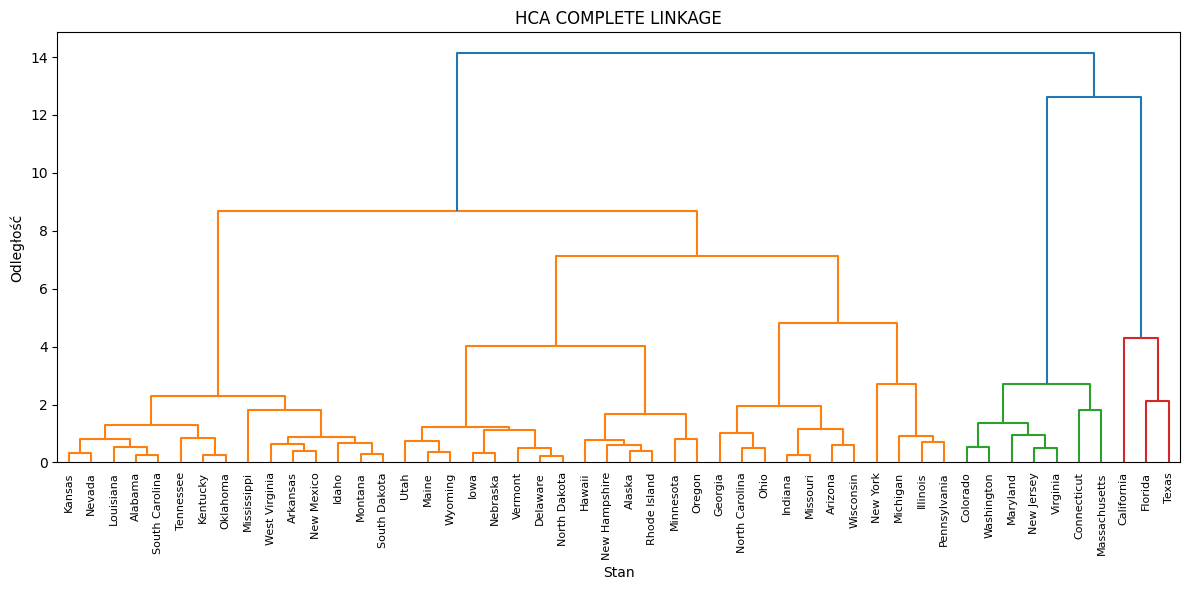

In [30]:
C = linkage(df_scaled, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title("HCA COMPLETE LINKAGE")
plt.xlabel("Stan")
plt.ylabel("Odległość")
plt.tight_layout()
plt.show()

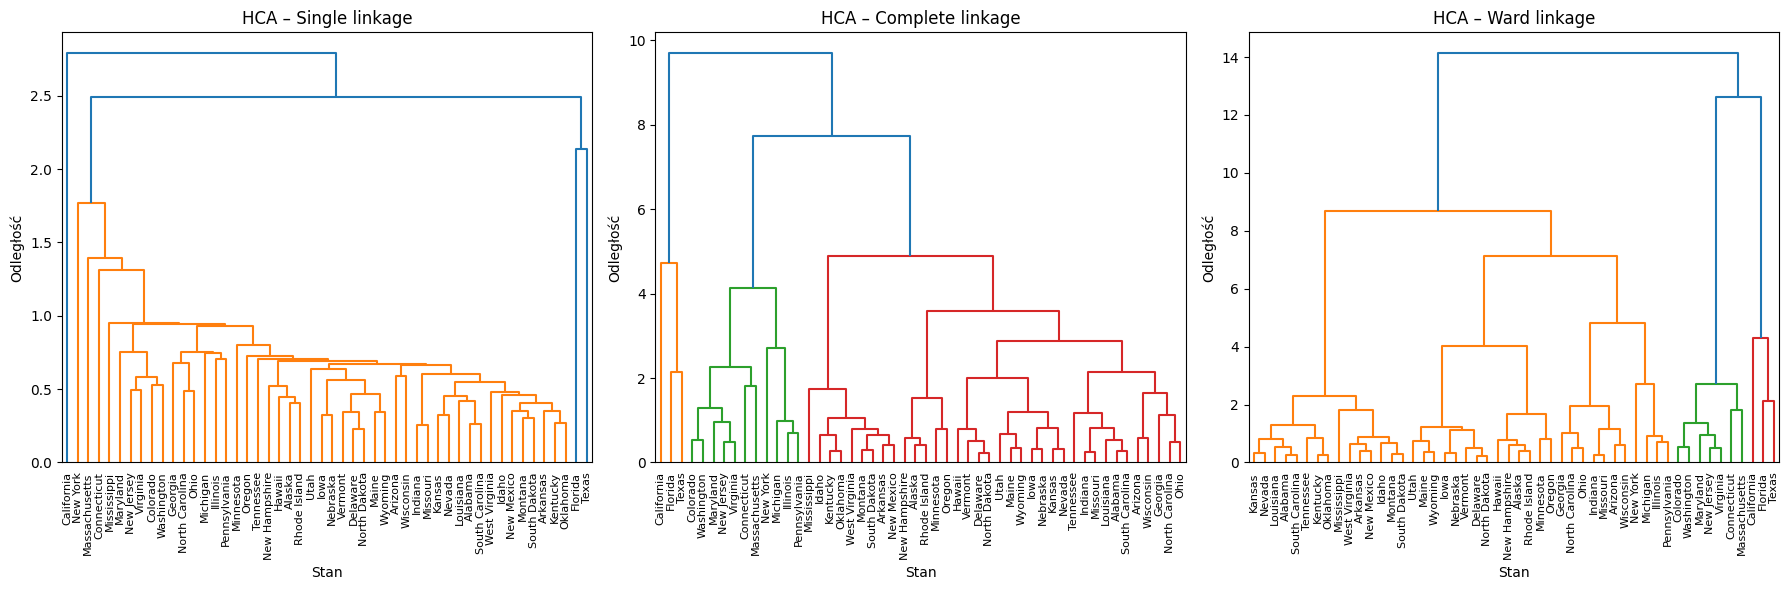

In [29]:
methods = ["single", "complete", "ward"]

plt.figure(figsize=(18, 6))

for i, method in enumerate(methods, 1):
    plt.subplot(1, 3, i)
    Z = linkage(df_scaled, method=method)
    dendrogram(Z, labels=df.index, leaf_rotation=90)
    plt.title(f"HCA – {method.capitalize()} linkage")
    plt.xlabel("Stan")
    plt.ylabel("Odległość")

plt.tight_layout()
plt.show()